<center>
    <img width="300" src="https://lh4.googleusercontent.com/Ny4Qy2USNALE4NmRFek3kMClM-GLK3xhjp-tpSkdTbKOlwwTiB3Z_hvQTxqf-1JrsJo=w2400">
</center>

<center>
    <i><b>Bellabeat</b> is a high-tech manufacturer of health-focused products for women. Its goal is to become a large player in the global smart device market.</i>
</center>

---

# Table of Contents
 
- [ASK](#ASK)
- [PREPARE](#PREPARE)
- [PROCESS](#PROCESS)
- [ANALYSE](#ANALYSE)
- [SHARE](#SHARE)

---

# ASK

Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. 

Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. 

Business Task

To analyze trends in smart devices in order to apply it to Bellabeat cutomers and influence its markting strategy. 
1. What device features are more often used? 
2. What is the lifestyle of the target audience?  
3. What ideas based on the data analysis stakeholders could consider for marketing and product development?

Key Stakeholders 

**Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer 

**Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

# PREPARE

For PREPARE  stage we answer the following questions
 
1. Where is data stored? How is the data organized?  

Data is stored in csv files, long data. Data provided by Kaggle. Please find [FitBit Fitness Tracker Data]

2. Does data ROCCC?

This data ROCCC with concerns.

Reliable -No.
As there is only 33 people survey that used other smart device FitBit. There is a concern that data may be BIAS depending on who took part in survey and that group is small.  

Original-No.
The originality of the dataset is low as the data is collected from a survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016 It is a secondary source from third party data and might be not as accurate and consistent. 

Comprehensive-No.
Fitbit data is missing gender and age information.  

Current-No.
The survey was conducted 2016 and by now it is 6 year old.

Cited-Yes. 
These datasets cite the survey conducted by Amazon Mechanical Turk, which is a crowdsourcing website.

3. Verify the data’s integrity and consitency


Data is inconsistent and need to format date in the following files.
- ActivityDate (dailyActivity_merged.csv)
- ActivityDay (dailyCalories_merged.csv, dailySteps_merged.csv, dailyIntensities_merged.csv)
- SleepDay(sleepDay_merged.csv)
- Date(weightLogInfo_merged.csv)

# PROCESS
 
1.I chose R programming as it gives wide range of functionality for analysis and to train my skills as well. I load libraries and csv files to create dataframes.

In [1]:
#libraries
library(tidyverse) # base in R 
library(readr)  # upload csv
library(lubridate) # date & time formats
library(dplyr)  # data manipulation 
library(ggplot2) # visualize
library(gridExtra) # grade the plots in ggplot    
library(highcharter)  # cool and interactive graphs graphs
library(RColorBrewer) # beautiful palettes

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Highcharts (www.highcharts.com) is a Highsoft software product which is

not free for commercial and Governmental use



I performed the view of csv files in RStudio. It showed that file dailyActivity_merged.csv includes data on steps, calories, distance, sedentary and veryactive time and fairlyactive time. Data from 
dailyCalories_merged, 
dailySteps_merged, 
hourlyCalories_merged  
is included into file dailyActivity_merged.

The data that is not included into dailyActivity_merged is data on 
sleep, intensities,  weight and heart rate.So I create 5 dataframes.

The other csv files contains data not relevant to my analisys.

In [2]:
#create dataframes
activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv") 
sleep_min <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heart_rate <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

glimpse() dataframes to see its structure and contents

head() dataframes to check column names

In [3]:
#structure and contents of dataframes

glimpse(activity)
glimpse(weight)
glimpse(intensities)
glimpse(sleep_min)
glimpse(heart_rate)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [4]:
#check the column names
head(activity)
head(weight)
head(intensities)
head(sleep_min)
head(heart_rate)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


Now I see that activity can be merged with sleep_min and weight. While intensities and heart_rate can be analysed separatly.


After I performed overview with head() I noticed that the date and time for analysis need to be separated and formated for future merge.
I will not need time in analysis so I do not spend time formating it.


2. CLEAN DATA

* drop for NA, duplicated rows
* format the date
* add weekdays


In [5]:
# drop_na and duplicated data
drop_na(activity)
duplicated(activity)
drop_na(sleep_min)
duplicated(sleep_min)
drop_na(weight)
duplicated(weight)
drop_na(intensities)
duplicated(intensities)
drop_na(heart_rate)
duplicated(heart_rate)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95
2022484408,4/12/2016 7:22:10 AM,91
2022484408,4/12/2016 7:22:15 AM,93
2022484408,4/12/2016 7:22:20 AM,94


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

I would like to see what weekdays are the most active,so procceed with format dates and add weekdays.

I will rearange columns for better view as well. 

In [6]:
#activity
#Format dates and add weekdays
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%Y")   
activity$weekday<-wday(activity$ActivityDate,label=TRUE)
head(activity,5)
#rearange columns
activity[, c(1,2,16,17, 3:15)]




Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,weekday
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<ord>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/2016,Tue
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/2016,Wed
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/2016,Thu
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/2016,Fri
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/2016,Sat


Id,ActivityDate,date,weekday,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<dttm>,<chr>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,04/12/2016,Tue,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,04/13/2016,Wed,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,04/14/2016,Thu,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,04/15/2016,Fri,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,04/16/2016,Sat,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,04/17/2016,Sun,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,2016-04-18,04/18/2016,Mon,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,2016-04-19,04/19/2016,Tue,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,2016-04-20,04/20/2016,Wed,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


In [7]:
#sleep_min
sleep_min$SleepDay=as.POSIXct(sleep_min$SleepDay, format="%m/%d/%Y", tz=Sys.timezone())
sleep_min$date <- format(sleep_min$SleepDay, format = "%m/%d/%Y")
head(sleep_min)


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,04/12/2016
1503960366,2016-04-13,2,384,407,04/13/2016
1503960366,2016-04-15,1,412,442,04/15/2016
1503960366,2016-04-16,2,340,367,04/16/2016
1503960366,2016-04-17,1,700,712,04/17/2016
1503960366,2016-04-19,1,304,320,04/19/2016


In [8]:
#weight
weight$Date=as.POSIXct(weight$Date, format="%m/%d/%Y", tz=Sys.timezone())
weight$date <- format(weight$Date, format = "%m/%d/%Y")
head(weight)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,05/02/2016
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,05/03/2016
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,04/13/2016
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,04/21/2016
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,05/12/2016
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12,04/17/2016


The only df where I want to use time for analysis is intensities. So I devide date and time into separate columns.

In [9]:
#separate time and date
#intensities
intensities <- intensities %>% separate(ActivityHour,c("Date","Time")," ")
head(intensities)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 22099 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,Date,Time,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016,12:00:00,20,0.333333
2,1503960366,4/12/2016,1:00:00,8,0.133333
3,1503960366,4/12/2016,2:00:00,7,0.116667
4,1503960366,4/12/2016,3:00:00,0,0.000000
5,1503960366,4/12/2016,4:00:00,0,0.000000
6,1503960366,4/12/2016,5:00:00,0,0.000000


# ANALYSE 

I will check unique Id for each dataframe 
summary data for all dataframes to start analyzing it.

In [10]:
#unique Id
n_distinct(activity$Id)
n_distinct(intensities$Id)
n_distinct(sleep_min$Id)
n_distinct(weight$Id)
n_distinct(heart_rate$Id)

[1] 33

[1] 33

[1] 24

[1] 8

[1] 14

* 33 used device for mesuaring the distance, steps, and various types of activity type.
* 24 users were checking the sleep time
* 8 users measured weight
* 14 checked heart rate


1. Check summary data for all dataframes and analyze it.


In [11]:
#activity
activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary() 

#sleep_min
sleep_min %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# weight
weight %>%
  select(WeightKg, BMI) %>%
  summary()



   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  
 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  


I will compare the average numbers from summary analysis to average recommended by CDC  - Centers for Disease Control and Prevention and HHS U.S. Department of Health and Human Services.

Results
 
Total Averge Steps is **7638** . 
The CDC  recommend that most adults aim for **10,000** steps per day . For most people, this is the equivalent of about 8 kilometers, or 5 miles. The average Total distance is **5490miles**. The recommendation to users to do more steps.

Total Average SedentaryMinutes  **991.2min or  16,52 h**!

It s definetly too much. LOW risk indicates sitting less than 4 hours per day. MEDIUM risk indicates sitting 4 to 8 hours per day. HIGH risk indicates sitting 8 to 11 hours per day. VERY HIGH risk indicates sitting more than 11 hours per day. 

Total Average VeryActiveMinutes & FairlyActiveMinutes   
VeryActiveMinutes 21.16 min a day or  148.12 min a week
FairlyActiveMinutes 13.5 min a day = 94.5 min a week 

According to 2019 guidelines from the U.S. Department of Health and Human Services (HHS), for general health adults should aim for 150 to 300 minutes of moderate physical activity or 75 to 150 minutes of vigorous-intensity aerobic physical activity each week.

Modarate activity time is ok.
Very active minutes should be higher!

Total Average Minutes Asleep **419.5min or 7h**
Seven to 9 hours is recommended for young adults and adults, and 7-8 hours of sleep is recommended for older adults. We can proceed with analysis to see the activity and weight.

Total Average BMI **25.19 min**  
It indocates avarege Overweight **(25.0 - 29.9)** of tested group.

Conclusion.
Tested group has by the following characteristics
1. Tends to overweight
2. Needs more sleep time
3. Needs more active time and less sedentary time
 

We can vizaulize in pie chart The level of activity.

In [12]:
#Activity in minutes
activity %>% 
  select(VeryActiveMinutes, 
         FairlyActiveMinutes, 
         LightlyActiveMinutes, 
         SedentaryMinutes) %>% 
  summarise(across(everything(), list(sum))) %>% 
  gather(active_level, minutes) %>% 
  mutate(active_level = factor(active_level, 
                          labels = c('Moderate','Light',
                                     'Sedentary','VeryActive'))) %>% 
  hchart('pie', hcaes(x = active_level, y = minutes)) %>% 
  hc_title(text = "Activity level in minutes",
           style = list(fontFamily = "Arial", fontSize = "30px"),
           align = "center") %>% 
  hc_tooltip(pointFormat = "<b>Value:</b> {point.y} <br>
                 <b>Percentage</b> {point.percentage:,.2f}%")

HTML widgets cannot be represented in plain text (need html)

2. Merge dataframes and vizualize correlations
 
* total steps vs calories
* sleep time vs calories
* activemin vs calories
* sedentarymin vs calories
      
   
* intesities vs hours
* intesities vs weekdays


* sleep time vs weekdays
* total steps vs weekdays    
* sedentary time vs weekdays
* very active time vs weekday


     
* BMI vs sedentary time
* BMI vs sleep time    
* BMI vs total steps
* BMI vs active time

In [13]:
#merge activity and sleep_min
activity_sleep<-merge(sleep_min,activity,by=c('Id','date'))
head(activity_sleep)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,⋯,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday
,<dbl>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1,1503960366,04/12/2016,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,⋯,1.88,0.55,6.06,0,25,13,328,728,1985,Tue
2,1503960366,04/13/2016,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,⋯,1.57,0.69,4.71,0,21,19,217,776,1797,Wed
3,1503960366,04/15/2016,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,⋯,2.14,1.26,2.83,0,29,34,209,726,1745,Fri
4,1503960366,04/16/2016,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,⋯,2.71,0.41,5.04,0,36,10,221,773,1863,Sat
5,1503960366,04/17/2016,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,⋯,3.19,0.78,2.51,0,38,20,164,539,1728,Sun
6,1503960366,04/19/2016,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,⋯,3.53,1.32,5.03,0,50,31,264,775,2035,Tue


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



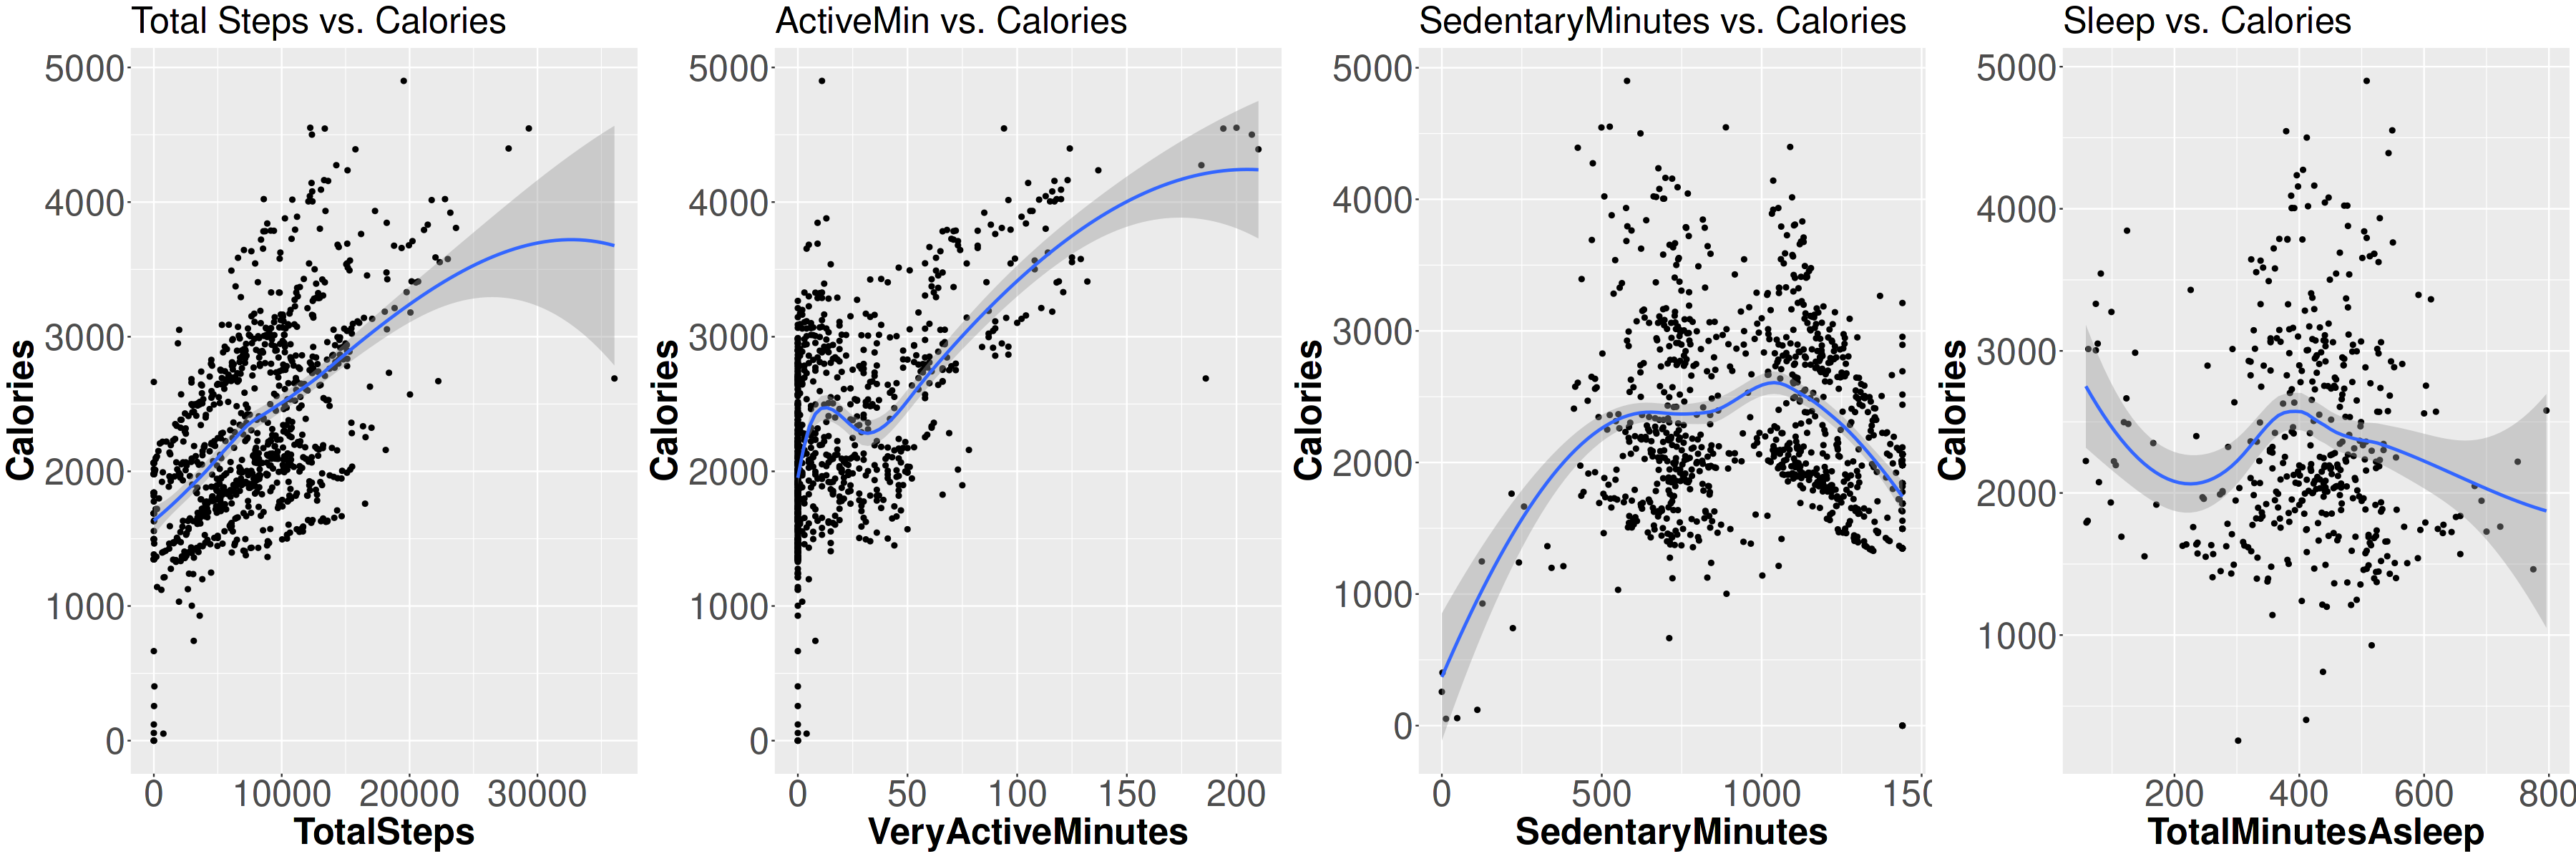

In [14]:
#totalsteps vs calories
totalsteps_calories<-ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")+
theme(axis.text=element_text(size=30),axis.title=element_text(size=30,face="bold"))+
theme(plot.title = element_text(size=30))
options(repr.plot.width = 30, repr.plot.height = 10) 

#activemin vs calories
activemin_calories<-ggplot(data=activity, aes(x=VeryActiveMinutes, y=Calories)) + 
geom_point() + geom_smooth() + labs(title="ActiveMin vs. Calories")+
theme(axis.text=element_text(size=30),axis.title=element_text(size=30,face="bold"))+
theme(plot.title = element_text(size=30))
options(repr.plot.width =30 , repr.plot.height =10) 

#SedentaryMin vs Calories
sedentarymin_calories<-ggplot(data=activity, aes(x=SedentaryMinutes, y=Calories)) + 
geom_point() + geom_smooth() + labs(title="SedentaryMinutes vs. Calories")+
theme(axis.text=element_text(size=30),axis.title=element_text(size=30,face="bold"))+
theme(plot.title = element_text(size=30))
options(repr.plot.width =30 , repr.plot.height =10) 

#Sleeptime  vs Calories
Sleep_calories<-ggplot(data=activity_sleep, aes(x=TotalMinutesAsleep, y=Calories))+
geom_point()+geom_smooth()+labs(title="Sleep vs. Calories")+
theme(axis.text=element_text(size=30),
axis.title=element_text(size=30,face="bold"))+theme(plot.title = element_text(size=30))

grid.arrange(totalsteps_calories, activemin_calories, sedentarymin_calories, Sleep_calories, ncol = 4)

-#totalsteps vs calories  - Correlation is straight - the more steps are made the more calories burned.

-#activemin vs calories  - Correlation is straight - the more is ActiveMin is the more calories burned.

-#SedentaryMin vs calories  - Correlation is inverse - the more is sedentary min is the less calories burned.

-#Sleeptime vs calories  - Correlation shows that most of calories burned when  sleep is between 400 and 550 min asleep.


Visualiaze correlation of intesities on time and weekdays

In [15]:
head(intensities)

,Id,Date,Time,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016,12:00:00,20,0.333333
2,1503960366,4/12/2016,1:00:00,8,0.133333
3,1503960366,4/12/2016,2:00:00,7,0.116667
4,1503960366,4/12/2016,3:00:00,0,0.000000
5,1503960366,4/12/2016,4:00:00,0,0.000000
6,1503960366,4/12/2016,5:00:00,0,0.000000


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


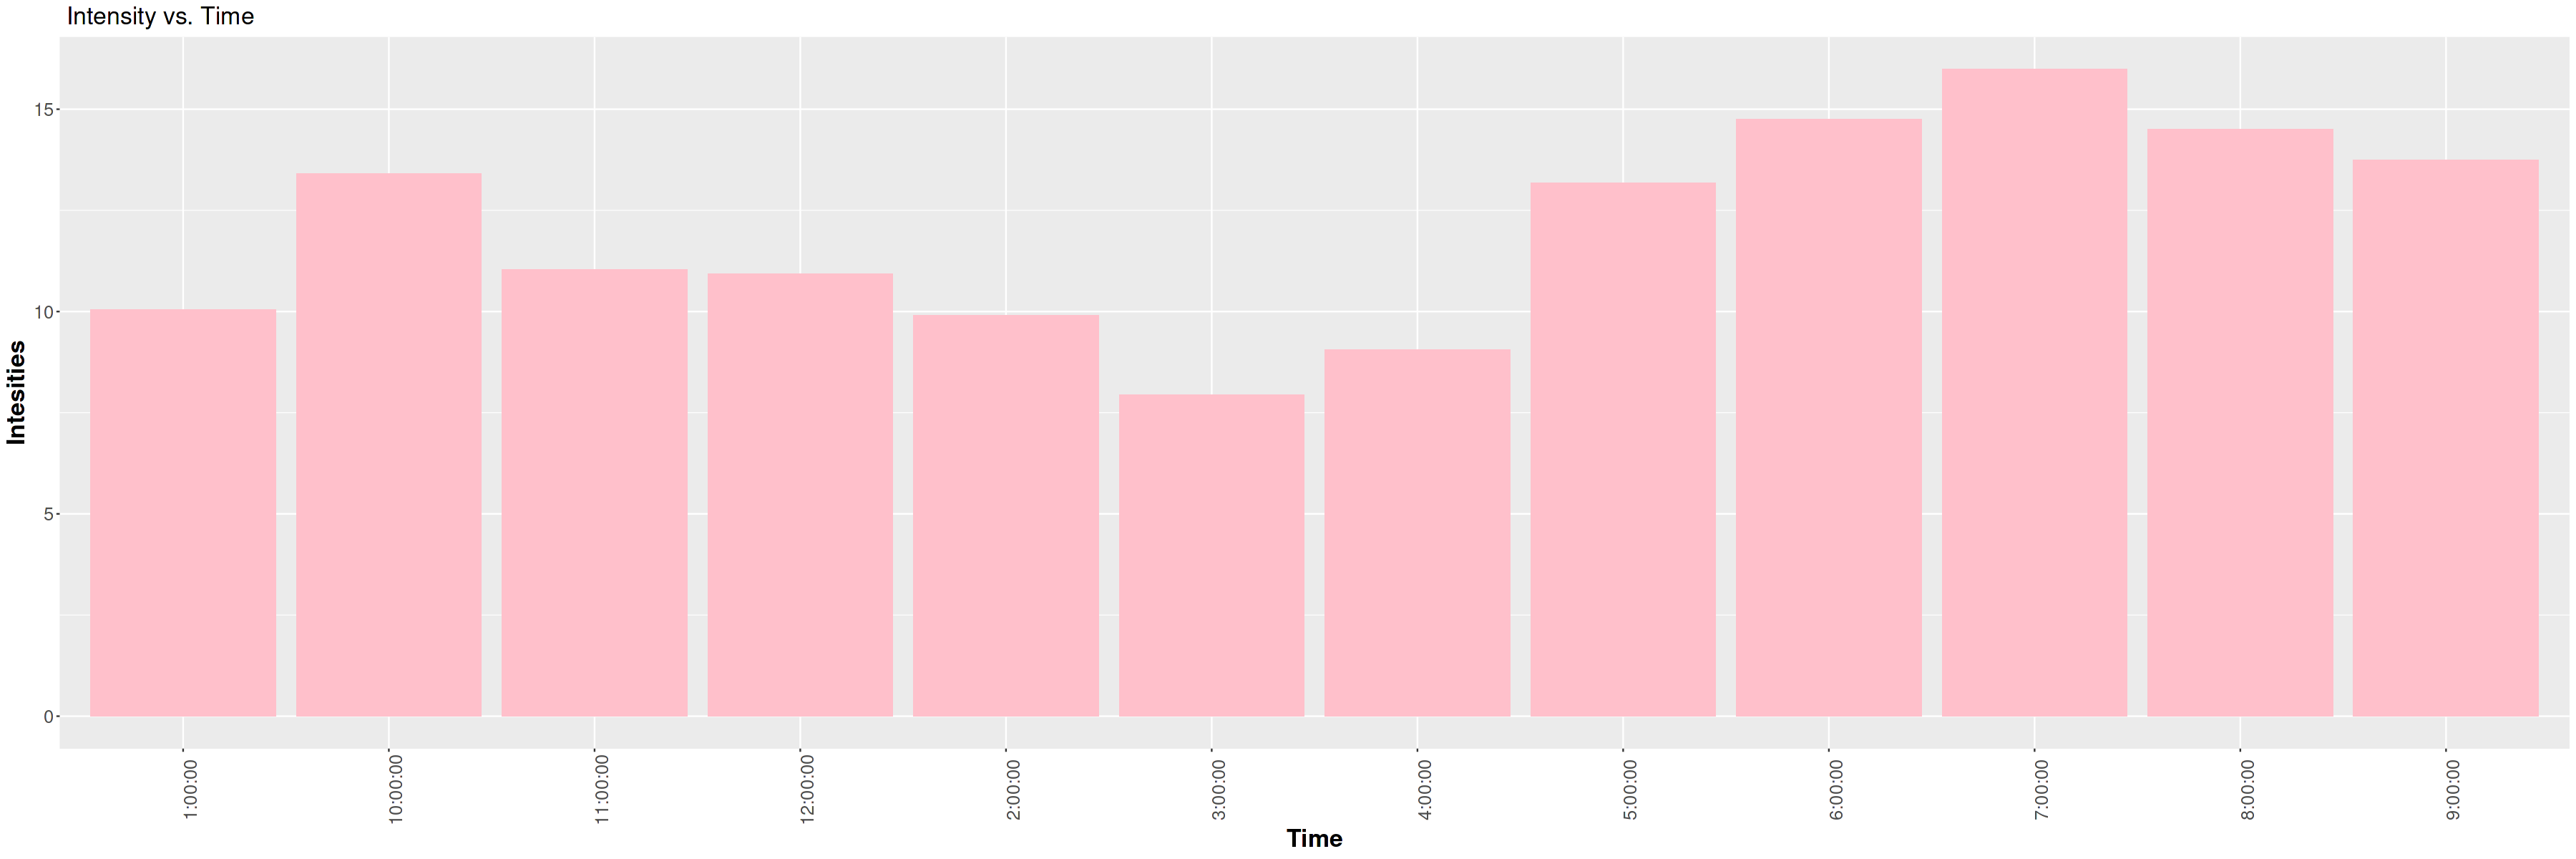

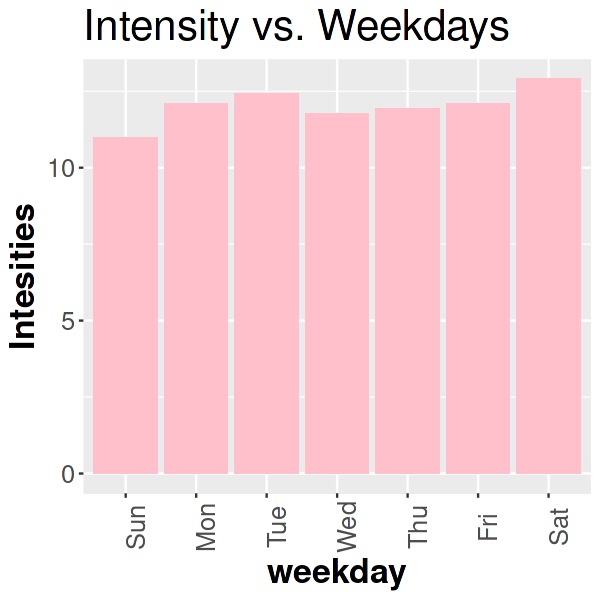

In [16]:
#group time
int_new <- intensities %>%
  group_by(Time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

#intensities vs time
ggplot(data=int_new, aes(x=Time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='pink') +
theme(axis.text.x = element_text(angle = 90)) +
labs(y= "Intesities", title=" Intensity vs. Time")+
theme(axis.text=element_text(size=15),axis.title=element_text(size=20,face="bold"))+
theme(plot.title = element_text(size=20))
options(repr.plot.width =5 , repr.plot.height =5) 

#getweekday intensities
intensities$Date=as.POSIXct(intensities$Date, format="%m/%d/%Y", tz=Sys.timezone())
intensities$date <- format(intensities$Date, format = "%m/%d/%Y")
intensities$weekday <- wday(intensities$Date, label=TRUE)
  
#add weekday
int_new2 <- intensities %>%
  group_by(weekday) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))
 
#Average Total Intensity vs. Weekdays
ggplot(data=int_new2, aes(x=weekday, y=mean_total_int)) + geom_histogram(stat = "identity", fill='pink') +
theme(axis.text.x = element_text(angle = 90)) +
labs(y= "Intesities", title="Intensity vs. Weekdays")+
theme(axis.text=element_text(size=15),axis.title=element_text(size=20,face="bold"))+
theme(plot.title = element_text(size=25))
options(repr.plot.width =5 , repr.plot.height =5)

Intensities vs time shows that group had most intense time at 10 am and from 5 pm till 9 pm.

Intensity vs. Weekdays does not show any correlation with intensities.


Most likely tested group goes for sport or walking after work/studies and some persentage has time to exercise before work/studies.

Next lets vizualise patterns of sleep, steps, sedentary and acitve time during the week.  

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


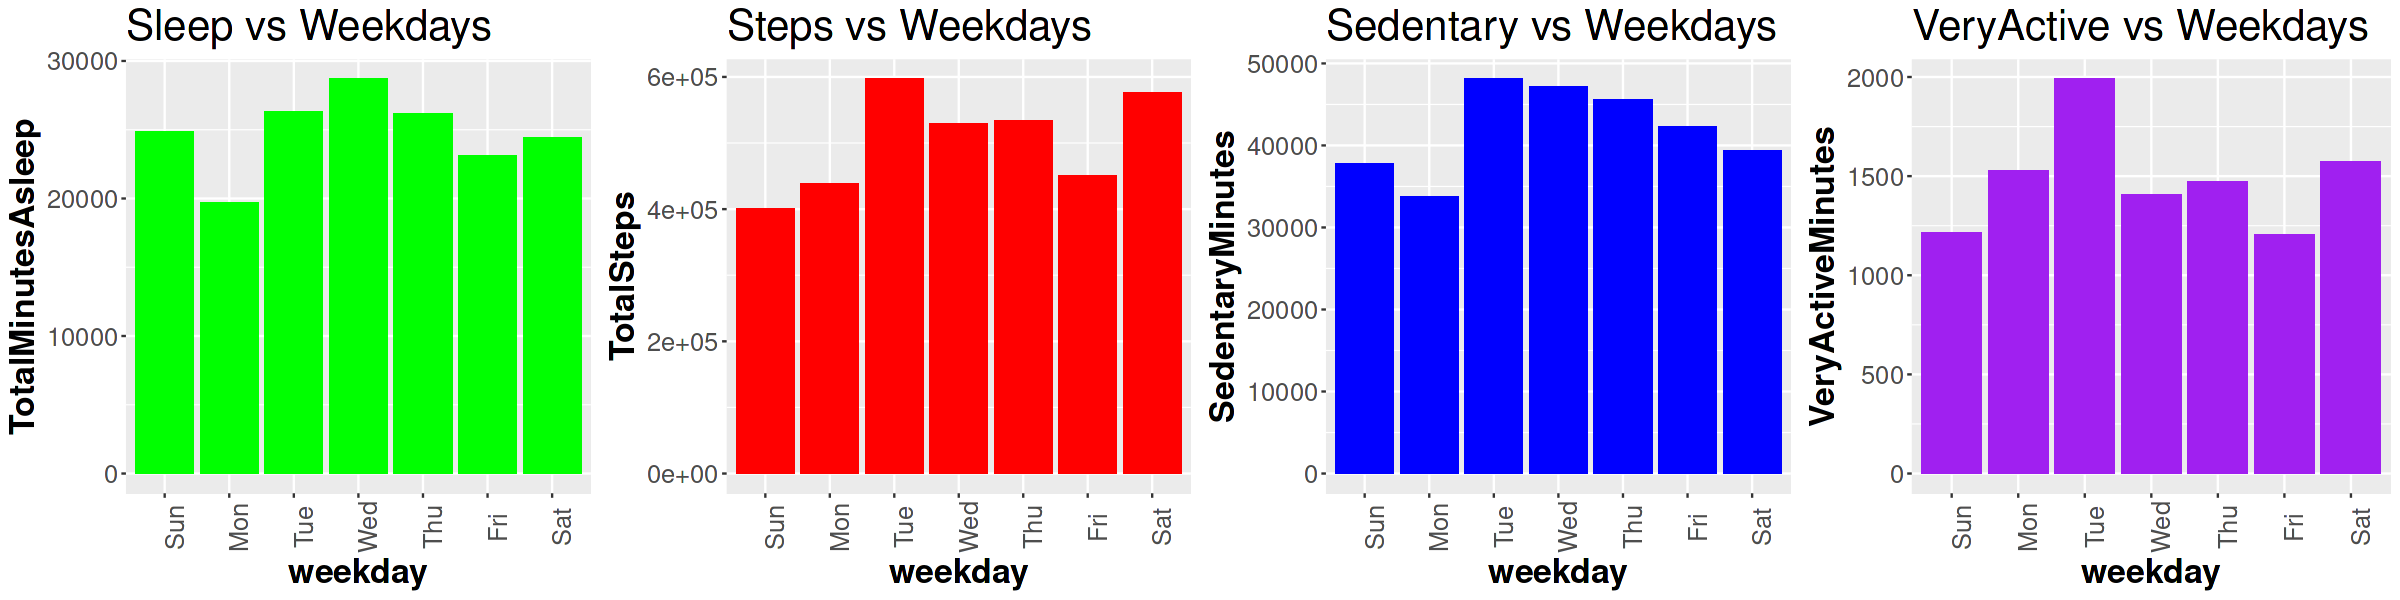

In [17]:
#sleep vs weekdays
Sleep_Weekdays<-ggplot(activity_sleep, aes(x=weekday, y=TotalMinutesAsleep)) + geom_histogram(stat = "identity", fill='green') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Sleep vs Weekdays")+
theme(axis.text=element_text(size=15),axis.title=element_text(size=20,face="bold"))+
theme(plot.title = element_text(size=25))
options(repr.plot.width =20 , repr.plot.height =5)

#total steps vs weekdays
Steps_Weekdays<-ggplot(activity_sleep, aes(x=weekday, y=TotalSteps)) + geom_histogram(stat = "identity", fill='red') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Steps vs Weekdays")+
theme(axis.text=element_text(size=15),axis.title=element_text(size=20,face="bold"))+
theme(plot.title = element_text(size=25))
options(repr.plot.width =20 , repr.plot.height =5)

#sedentarytime vs weekdays
Sedentarytime_Weekdays<-ggplot(activity_sleep, aes(x=weekday, y=SedentaryMinutes)) + geom_histogram(stat = "identity", fill='blue') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Sedentary vs Weekdays")+
theme(axis.text=element_text(size=15),axis.title=element_text(size=20,face="bold"))+
theme(plot.title = element_text(size=25))
options(repr.plot.width =20 , repr.plot.height =5)

#veryactive vs weekdays
VeryActiveMinutes_Weekdays<-ggplot(activity_sleep, aes(x=weekday, y=VeryActiveMinutes)) + geom_histogram(stat = "identity", fill='purple') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="VeryActive vs Weekdays")+
theme(axis.text=element_text(size=15),axis.title=element_text(size=20,face="bold"))+
theme(plot.title = element_text(size=25))
options(repr.plot.width =20 , repr.plot.height =5)

grid.arrange(Sleep_Weekdays, Steps_Weekdays, Sedentarytime_Weekdays, VeryActiveMinutes_Weekdays, ncol = 4)



Here we analysed patterns of sleep, steps, sedentary and acitve time during the week.

Sleep less Monday,Friday  - more Tuesday, Wed, Thursday

Steps less Sun, Monday, Friday - more Tue, Sat

Sedentary time less Sun, Mon - more Tue,Wed, Thur

Active time are less Sun, Fr - more Tuesday

In [18]:
#adding weight data
activity_sleep_weight<-merge(weight,activity_sleep,by=c('Id','date'))
head(activity_sleep_weight)

,Id,date,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,SleepDay,⋯,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday
,<dbl>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dttm>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1,1503960366,05/02/2016,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02,⋯,3.21,0.57,5.92,0,41,15,277,798,2004,Mon
2,1503960366,05/03/2016,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03,⋯,3.73,1.05,4.88,0,50,24,254,816,1990,Tue
3,1927972279,04/13/2016,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,2016-04-13,⋯,0.00,0.00,0.25,0,0,0,32,986,2151,Wed
4,4558609924,05/01/2016,2016-05-01,69.9,154.1031,NA,27.32,TRUE,1.462147e+12,2016-05-01,⋯,0.00,0.00,2.27,0,0,0,190,1121,1692,Sun
5,5577150313,04/17/2016,2016-04-17,90.7,199.9593,NA,28.00,FALSE,1.460885e+12,2016-04-17,⋯,5.98,0.83,2.32,0,200,37,159,525,4552,Sun
6,6962181067,04/12/2016,2016-04-12,62.5,137.7889,NA,24.39,TRUE,1.460506e+12,2016-04-12,⋯,3.40,0.83,2.51,0,50,14,189,796,1994,Tue


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



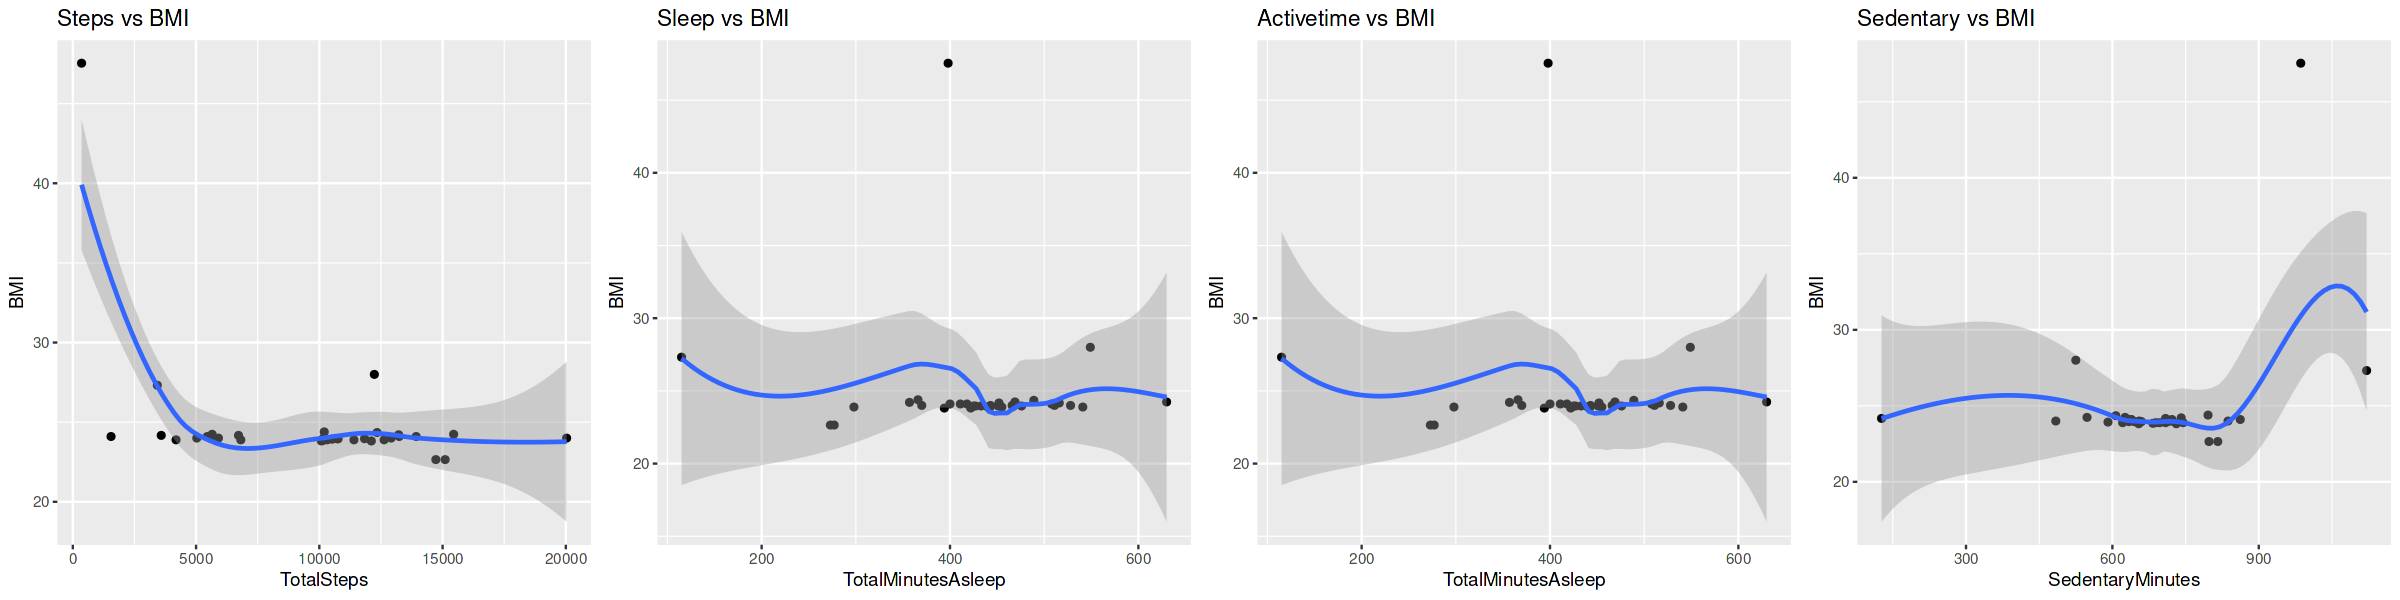

In [19]:
#Total steps vs BMI  
steps_BMI<-ggplot(data=activity_sleep_weight, aes(x=TotalSteps, y=BMI)) + 
geom_point() + geom_smooth() + labs(title="Steps vs BMI")
options(repr.plot.width =20 , repr.plot.height =5)
#Sleep vs BMI
sleep_BMI<-ggplot(data=activity_sleep_weight, aes(x=TotalMinutesAsleep, y=BMI)) + 
geom_point() + geom_smooth() + labs(title="Sleep vs BMI")
options(repr.plot.width =20 , repr.plot.height =5)

#Activetime vs BMI
activetime_BMI<-ggplot(data=activity_sleep_weight, aes(x=TotalMinutesAsleep, y=BMI)) + 
geom_point() + geom_smooth() + labs(title="Activetime vs BMI")
options(repr.plot.width =20 , repr.plot.height =5)

#Sedentary vs BMI
sedentary_BMI<-ggplot(data=activity_sleep_weight, aes(x=SedentaryMinutes, y=BMI)) + 
geom_point() + geom_smooth() + labs(title="Sedentary vs BMI")
options(repr.plot.width =20 , repr.plot.height =5)

grid.arrange(steps_BMI, sleep_BMI, activetime_BMI, sedentary_BMI, ncol = 4)

All 4 graphs shows no correlation of BMI and steps,sleep,acctive time, sedentary time. 

There is no obseravation found due to unsufficient amount of observations in BMI weight df.

# SHARE

1. What device features are more often used?

Distance,steps,activity measurment and sleep features were recorded most.

33 monitor the distance, steps
24 monitor the sleep time.
8 monitor weight

It may show as well that wearing deivice during sleep was not comfortable for some users. 
The weight feature may be not easy/convinient to add into device.

BELLABEAT is designed for women. As a next step I would recommend is to analyse more data that includes gender and age to get clear idea about device features popularity among women segrated by age and lifestyle.


2. What is the lifestyle of target audience?  

The analysis showed that tested group has the following characteristics.

* Working or studying group 
* Mostly active at 10 am and between 5 and 7 pm and certain weekdays
* Tends to overweight
* Needs more sleep time
* Needs more active time and less sedentary time

This image of target audience can give tips about advertisment that will attract certain type of people.
 
3. What ideas based on the data analysis stakeholders could consider for marketing and product development?

BELLABEAT can consider to include notifications 

 * to remind people to do exercises/walk when the sedentary time during the day has reached certain level 
  
*  to remind about activity every day during the week to maintain consistensy of movements 
 
* to sleep earlier 
  
* to set the goals for steps, sleep, distance and weight
  
* to  motivate and praise for the achievments  

PS **Thank you for reading my project! Please comment and upvote if you find it useful**

This is my first project in R and Data Analytics for the Google Analytics Certificate Course.

I would appreciate your comments and suggestions for improvement.

I would like to thank the projects that gave me ideas and insipration.

https://www.kaggle.com/code/mimosabella/fitness-tracker-a-usage-trends-analysis-with-r

https://www.kaggle.com/code/chebotinaa/bellabeat-case-study-with-r

https://www.kaggle.com/code/miguelfzzz/bellabeat-data-analysis-discovering-trends